In [20]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fn = 'Data\CHELSA_tas_1981-2010_V.2.1.nc'  
ds = nc.Dataset(fn)  
df = pd.read_csv('Data\estimation_dataset.csv')

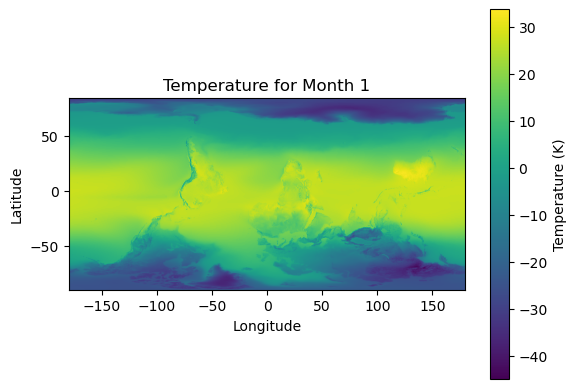

In [15]:
tas = ds.variables['tas'][:]
lon = ds.variables['lon'][:]
lat = ds.variables['lat'][:]
month = ds.variables['month'][:]
# Example: Plot temperature for the first month
plt.imshow(tas[0, :, :], extent=(lon.min(), lon.max(), lat.min(), lat.max()), origin='lower')
plt.colorbar(label='Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature for Month 1')
plt.show()

In [28]:
# Function to find the nearest index
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

# Initialize an empty list to store tas values
avg_tas_values_list = []

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    lat_value = row['Lat']
    lon_value = row['Long']
    
    # Find the nearest indices
    lat_idx = find_nearest(lat, lat_value)
    lon_idx = find_nearest(lon, lon_value)
    
    # Extract the tas value for the specific location
    tas_value = tas[:, lat_idx, lon_idx]
    
    # Calculate the average tas value
    avg_tas_value = np.mean(tas_value)
    avg_tas_values_list.append(avg_tas_value)

# Add the tas values to the dataframe
df['Mean Temperature (K)'] = avg_tas_values_list

In [ ]:
df.to_csv('Data\estimation_dataset.csv', index = True, encoding='utf_8_sig')